Testing Qiskit
===================


In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
# from qiskit_ibm_runtime import EstimatorV2 as Estimator


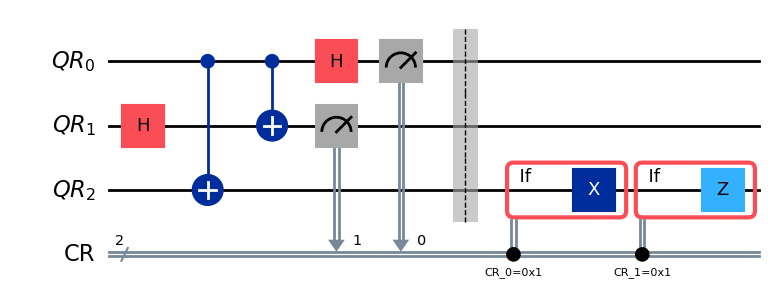

In [15]:
# Create a new circuit with two qubits
qr = QuantumRegister(3, "QR")
cr = ClassicalRegister(2, "CR")
qc = QuantumCircuit(qr,cr)


# Make Bell state
qc.h(1)
qc.cx(qr[0], qr[2])

# entangle 0 and 1
qc.cx(qr[0], qr[1])

# measure 0 and 1
qc.h(qr[0])
qc.measure([0,1], [0,1])
 
qc.barrier()

# correct qubit 2
with qc.if_test((cr[0], 1)):
    qc.x(2)
with qc.if_test((cr[1], 1)):
    qc.z(2)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")